In [8]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot

In [9]:
data = read_csv_data("../data/processed_job_postings_large.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level"], "standardized_annual_salary")
data = clean_location(data, 2)
import random
random.seed(42)
random.shuffle(data)

train_data = data[:20000]
val_data = data[20000:30000]
test_data = data[30000:]

In [10]:
print(data[10])



(['Law Enforcement', 'FULL_TIME', 'OH', 'Entry level'], '78000.0')


In [11]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

7

In [12]:
from src.models.mlp import MLPDataset
# temp looks like this
# [([Tensor1, Tensor2, Tensor3, Tensor4] ,$30000), ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_one_hot = MLPDataset(temp, [float(target) for _, target in train_data])

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_one_hot = MLPDataset(temp, [float(target) for _, target in val_data])

In [13]:
from mlp import MLP, train_model
total_features = len(vocab_type) + len(vocab_sector) + len(vocab_state) + len(vocab_level)
model = MLP(input_size=total_features, hidden_size=100, output_size=1)  

Iteration 50: Train Loss 122027.04215549777, Validation Loss 134854.8969997031
Iteration 100: Train Loss 121823.50356131306, Validation Loss 134651.3697276381
Iteration 150: Train Loss 121491.048961944, Validation Loss 134322.1550576018
Iteration 200: Train Loss 121020.6031000864, Validation Loss 133851.04114835802
Iteration 250: Train Loss 120295.50919009955, Validation Loss 133133.7858008238
Iteration 300: Train Loss 119587.97886468754, Validation Loss 132424.92819004506
Iteration 350: Train Loss 118826.0840582849, Validation Loss 131669.15277271107
Iteration 400: Train Loss 118018.45485670409, Validation Loss 130862.6894487609
Iteration 450: Train Loss 117004.63534650512, Validation Loss 129848.3955213439
Iteration 500: Train Loss 115995.19665317629, Validation Loss 128845.29857412708
Iteration 550: Train Loss 114743.69363982174, Validation Loss 127616.91411965931
Iteration 600: Train Loss 113774.46533667234, Validation Loss 126614.79892669054
Iteration 650: Train Loss 112639.454411

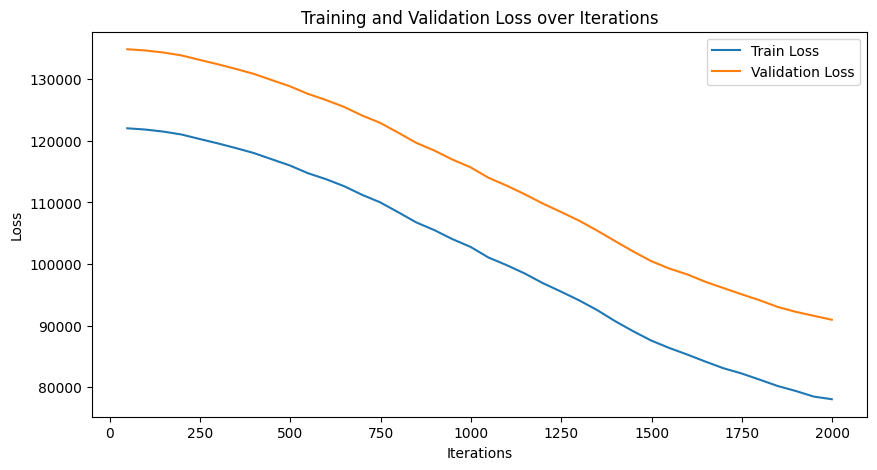

In [14]:
train_model(model, train_one_hot, val_one_hot, 0.01)